In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
from citipy import citipy
import requests
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes into a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, the we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficint count
print(len(cities))

621


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | aloleng
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | dakar
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | gumdag
Processing Record 10 of Set 1 | nagato
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | hihifo
City not found. Skipping...
Processing Record 13 of Set 1 | susangerd
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | macusani
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | toro
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1

Processing Record 44 of Set 4 | cap malheureux
Processing Record 45 of Set 4 | ishinomaki
Processing Record 46 of Set 4 | tarauaca
Processing Record 47 of Set 4 | razole
Processing Record 48 of Set 4 | grand-bourg
Processing Record 49 of Set 4 | seoul
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | merauke
Processing Record 2 of Set 5 | terrace
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | verkh-usugli
Processing Record 5 of Set 5 | nichinan
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | calama
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | omsukchan
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | bereda
Processing Record 12 of Set 5 | tahta
Processing Record 13 of Set 5 | miri
Processing Record 14 of Set 5 | torbay
Processing Record 15 of Set 5 | faya
Processing Record 16 of Set 5 | onguday
Processing Record 17 of Set 5 | amderma
City not found. Skipping...
Pro

Processing Record 35 of Set 8 | acapetahua
Processing Record 36 of Set 8 | salta
Processing Record 37 of Set 8 | peringat
Processing Record 38 of Set 8 | nabire
Processing Record 39 of Set 8 | opuwo
Processing Record 40 of Set 8 | teguldet
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | umm lajj
Processing Record 43 of Set 8 | kualakapuas
Processing Record 44 of Set 8 | altay
Processing Record 45 of Set 8 | grand gaube
Processing Record 46 of Set 8 | saint-pierre
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | barra do garcas
Processing Record 49 of Set 8 | malwan
City not found. Skipping...
Processing Record 50 of Set 8 | dickinson
Processing Record 1 of Set 9 | lensk
Processing Record 2 of Set 9 | dmitriyevka
Processing Record 3 of Set 9 | otane
Processing Record 4 of Set 9 | wahran
City not found. Skipping...
Processing Record 5 of Set 9 | nouakchott
Processing Record 6 of Set 9 | skelleftea
Processing Record 7 of Set 9 | longonjo
Proc

Processing Record 23 of Set 12 | atar
Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | tambun
Processing Record 26 of Set 12 | vao
Processing Record 27 of Set 12 | chirongui
Processing Record 28 of Set 12 | masinloc
Processing Record 29 of Set 12 | mildura
Processing Record 30 of Set 12 | warqla
City not found. Skipping...
Processing Record 31 of Set 12 | novikovo
Processing Record 32 of Set 12 | cap-aux-meules
Processing Record 33 of Set 12 | fergus falls
Processing Record 34 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 12 | pinheiro
Processing Record 36 of Set 12 | peace river
Processing Record 37 of Set 12 | rawson
Processing Record 38 of Set 12 | baishishan
Processing Record 39 of Set 12 | sobolevo
Processing Record 40 of Set 12 | platteville
Processing Record 41 of Set 12 | mago
Processing Record 42 of Set 12 | lewiston
Processing Record 43 of Set 12 | lazaro cardenas
Processing Record 44 of Set 12 | pyshma
Processing Reco

In [8]:
len(city_data)

574

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,34.43,98,96,11.05,RU,2022-07-05 23:05:37
1,Aloleng,16.1307,119.7824,80.98,73,100,3.42,PH,2022-07-05 23:05:38
2,Bambous Virieux,-20.3428,57.7575,65.21,77,94,14.18,MU,2022-07-05 23:05:38
3,Dakar,14.6937,-17.4441,79.57,87,51,12.55,SN,2022-07-05 23:05:38
4,Rikitea,-23.1203,-134.9692,76.08,72,6,17.90,PF,2022-07-05 23:05:39
5,Kodiak,57.7900,-152.4072,63.91,68,20,9.22,US,2022-07-05 23:05:39
6,Ushuaia,-54.8000,-68.3000,29.86,74,20,5.75,AR,2022-07-05 23:05:40
7,Jamestown,42.0970,-79.2353,78.03,81,100,8.05,US,2022-07-05 23:05:40
8,Gumdag,39.2061,54.5906,74.79,38,0,1.34,TM,2022-07-05 23:05:41
9,Nagato,34.3833,131.2000,79.27,89,68,3.69,JP,2022-07-05 23:05:41


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [22]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

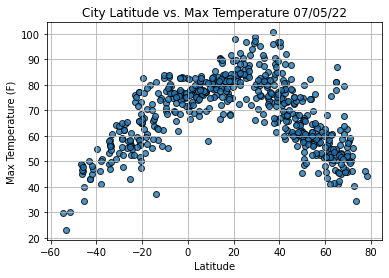

In [24]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

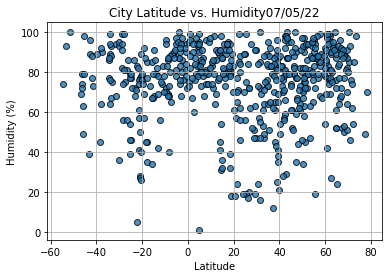

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

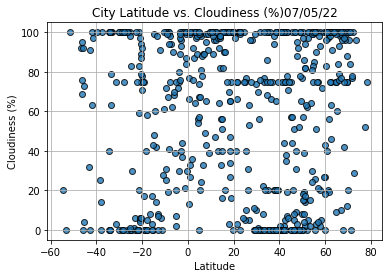

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plt
plt.show()

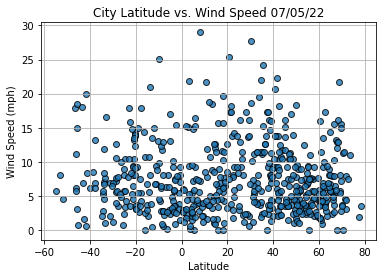

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

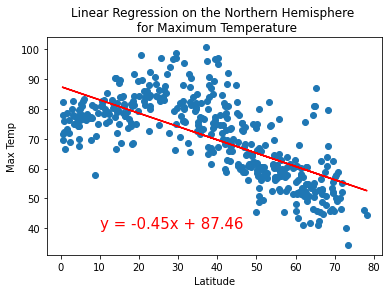

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

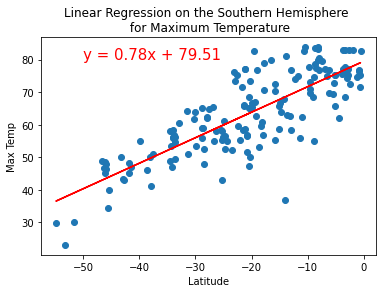

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

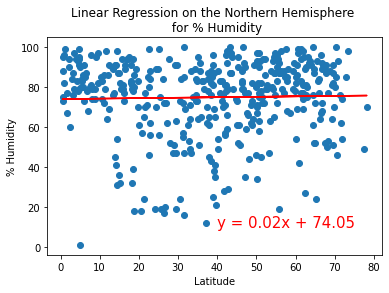

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

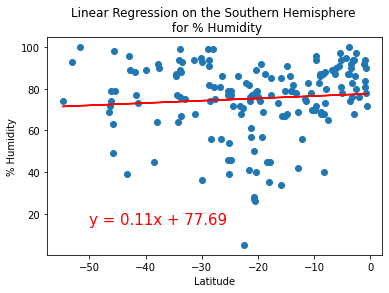

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

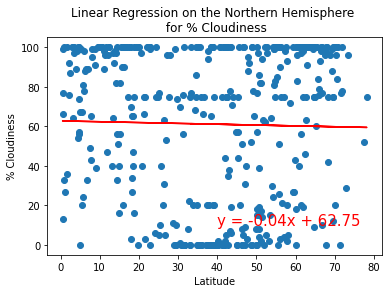

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

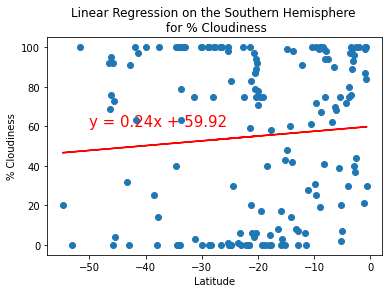

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

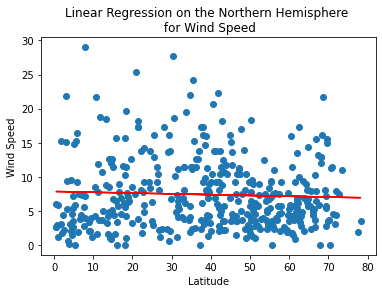

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

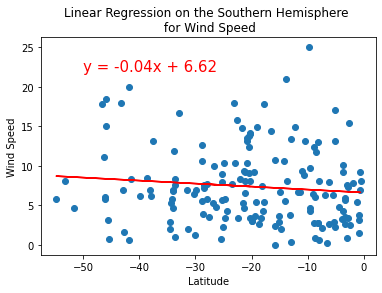

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,22))